In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<font color = "blue">
<font size = 5>
2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [76]:
df = pd.read_excel("Contraceptive_method_dataset.xlsx")

In [77]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


There are 10 variables out of which 3 are numerical

In [79]:
df.shape

(1473, 10)

The dataset has 1473 rows and 10 columns.

In [80]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,NaN,NaN,NaN,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The Wife age is between the range of 16 to 49 with 33 as mean.
* Most of the women has tertiary education with very high standard of living, scientology and exposed to media.

## Univariate

In [81]:
cat = list(df.dtypes[df.dtypes == 'object'].index)

for i in cat:
    print(i.upper())
    print(df[i].value_counts())
    print('*'*100)

WIFE_ EDUCATION
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64
****************************************************************************************************
HUSBAND_EDUCATION
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64
****************************************************************************************************
WIFE_RELIGION
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64
****************************************************************************************************
WIFE_WORKING
No     1104
Yes     369
Name: Wife_Working, dtype: int64
****************************************************************************************************
STANDARD_OF_LIVING_INDEX
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64
****************************************

In [82]:
num = list(df.dtypes[df.dtypes != 'object'].index)
num

['Wife_age', 'No_of_children_born', 'Husband_Occupation']

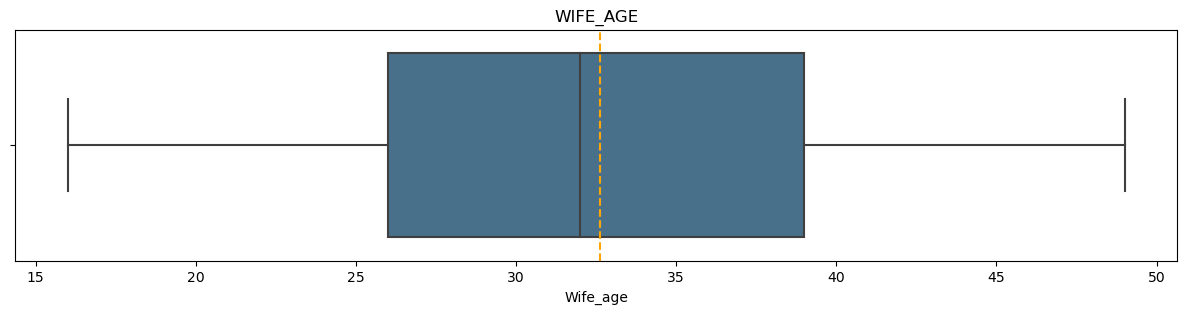

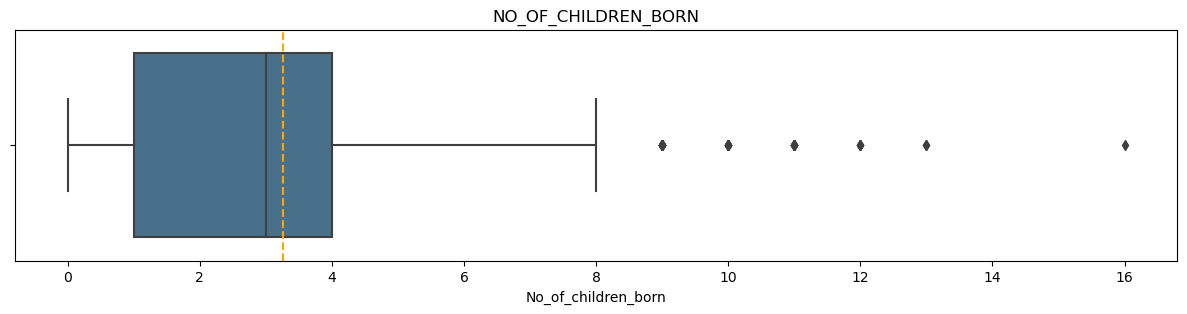

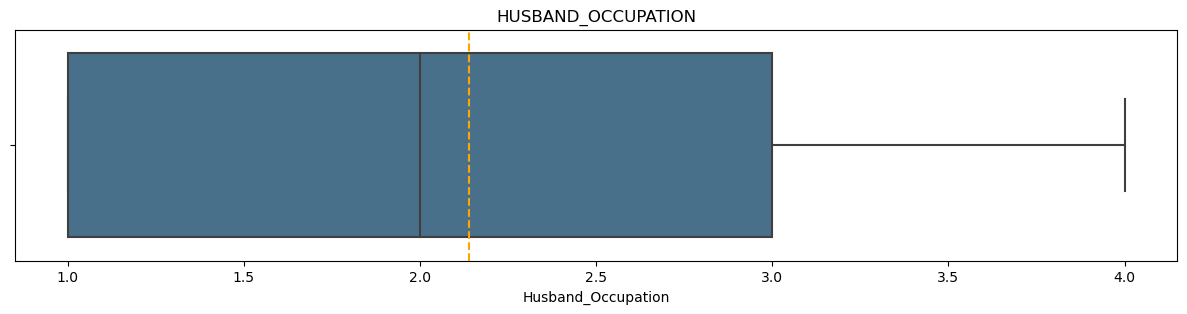

In [83]:
def plot_box(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.boxplot(data = df,x = i,saturation = 0.45)
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_box(df,num)

* The outlier in the number of children can be acceptable as problem statement is about Contraceptive method used.

## Bivariate

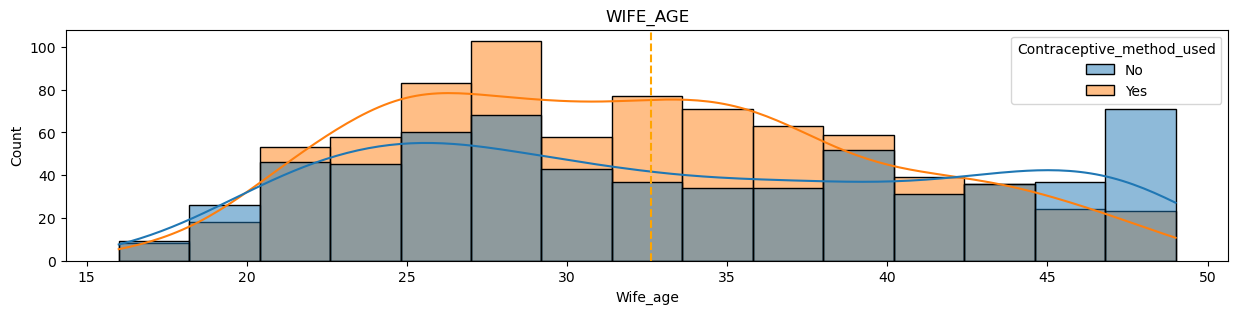

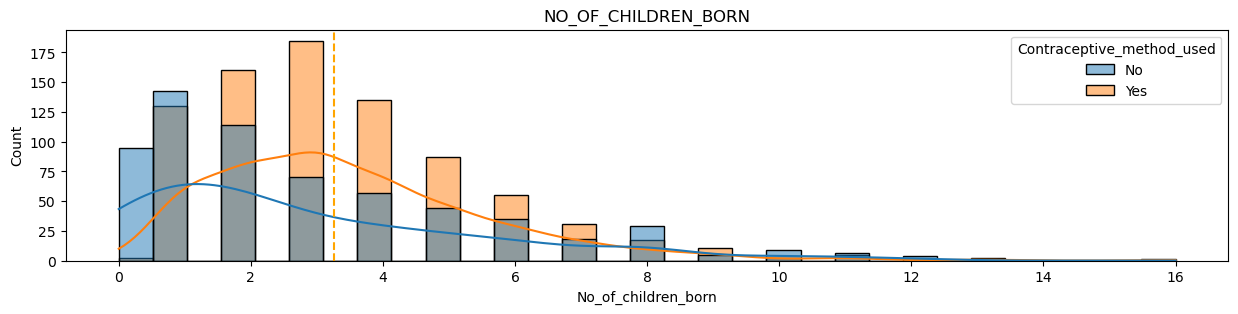

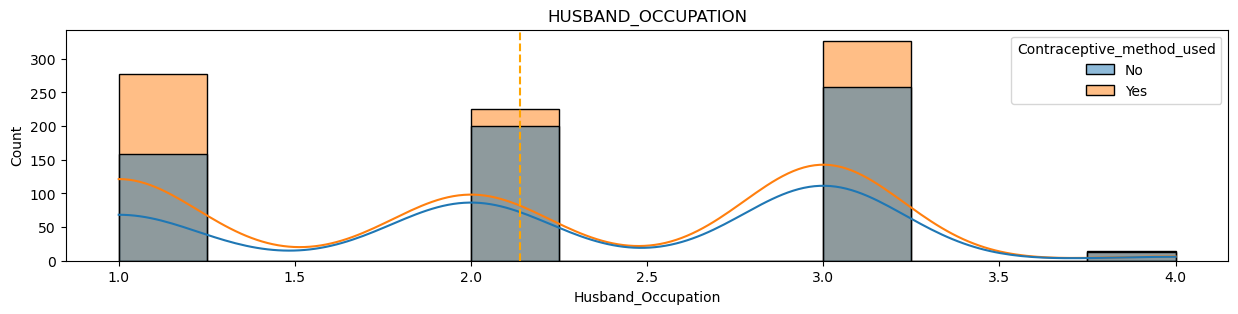

In [84]:
def plot_hist(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.histplot(data = df,x = i,kde=True,hue="Contraceptive_method_used")
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_hist(df,num)

* The mean number of children born is 3. The women using/not using contraceptive method are overlapped in the plots. There is no clear seperation between two category.

In [85]:
from scipy.stats import skew
for i in num:
    print('Skewness in {} = {}'.format(i,skew(df[i])))
    print() 

Skewness in Wife_age = nan

Skewness in No_of_children_born = nan

Skewness in Husband_Occupation = -0.09881755149877954



C:\Users\skrsk\AppData\Local\Temp\ipykernel_956\4089938608.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

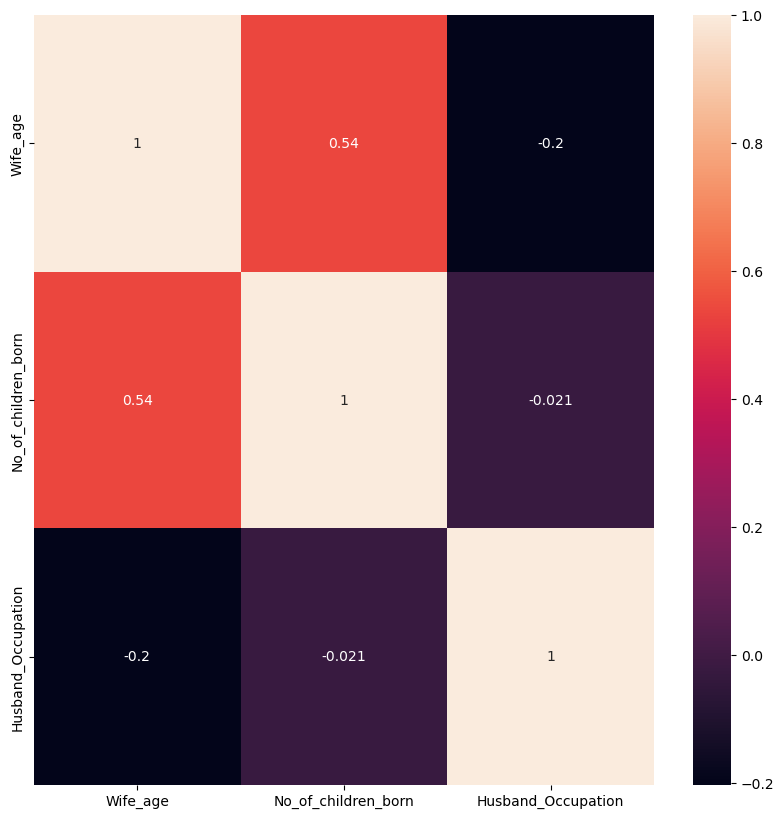

In [86]:
fig,axes = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Multivariate

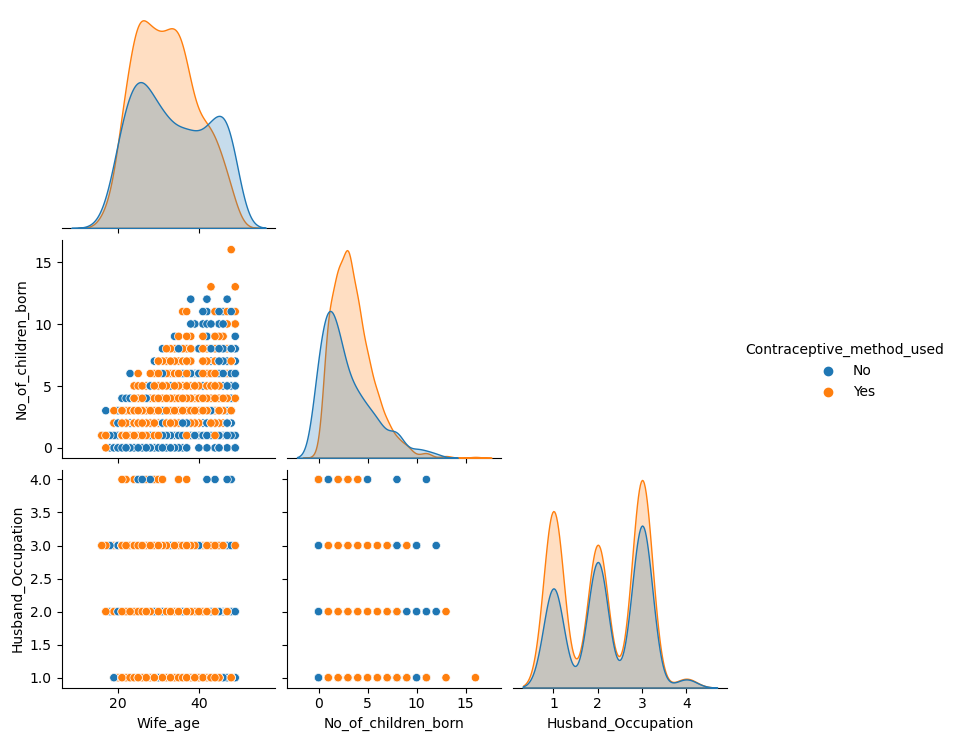

In [87]:
sns.pairplot(df, diag_kind="kde",corner=True,hue="Contraceptive_method_used")

## Null and Duplicates

In [88]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

There is null values in wife age and no of children being born.

In [89]:
dups = df.duplicated()
dups.sum()

80

As we dont have any id column, the duplicates can be of two different individual. In this case, duplicates are removed.

In [90]:
df[df.duplicated()] 

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
...,...,...,...,...,...,...,...,...,...,...
1367,44.0,Tertiary,Tertiary,5.0,Scientology,Yes,1,Very High,Exposed,Yes
1387,NaN,Secondary,Tertiary,2.0,Scientology,Yes,2,Very High,Exposed,Yes
1423,NaN,Tertiary,Tertiary,2.0,Non-Scientology,No,1,Very High,Exposed,Yes
1440,NaN,Tertiary,Tertiary,1.0,Non-Scientology,Yes,2,Very High,Exposed,Yes


In [91]:
df.drop_duplicates(inplace=True)

In [92]:
df.shape

(1393, 10)

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1326.0,32.557315,8.289259,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1372.0,3.290816,2.399697,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0


In [94]:
df["Wife_age"].replace(np.nan,df["Wife_age"].median(),inplace=True)
df["No_of_children_born"].replace(np.nan,df["No_of_children_born"].median(),inplace=True)

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1393.0,32.530510,8.088188,16.0,26.0,32.0,38.0,49.0
No_of_children_born,1393.0,3.286432,2.381791,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0


In [96]:
from scipy.stats import skew
for i in num:
    print('Skewness in {} = {}'.format(i,skew(df[i])))
    print() 

Skewness in Wife_age = 0.27561045371388626

Skewness in No_of_children_born = 1.1000491486638886

Skewness in Husband_Occupation = -0.15477540428760683



Right Skewed
* Wife age
* No of children born

Left Skewed
* Husband occupation

In [97]:
for i in cat:
    print(i.upper())
    print(df[i].value_counts())
    print('*'*100)

WIFE_ EDUCATION
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64
****************************************************************************************************
HUSBAND_EDUCATION
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64
****************************************************************************************************
WIFE_RELIGION
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64
****************************************************************************************************
WIFE_WORKING
No     1043
Yes     350
Name: Wife_Working, dtype: int64
****************************************************************************************************
STANDARD_OF_LIVING_INDEX
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64
****************************************

In [98]:
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used'] =='Yes', 0, df['Contraceptive_method_used'])
df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used'] =='No', 1, df['Contraceptive_method_used'])
df

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,1
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,1
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,1
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,1
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,1
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,Tertiary,Tertiary,3.0,Scientology,Yes,2,Very High,Exposed,0
1469,33.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,0
1470,39.0,Secondary,Secondary,3.0,Scientology,Yes,1,Very High,Exposed,0
1471,33.0,Secondary,Secondary,3.0,Scientology,Yes,2,Low,Exposed,0


In [99]:
df['Wife_ education']=np.where(df['Wife_ education'] =='Uneducated', 0, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Primary', 1, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Secondary', 2, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Tertiary', 3, df['Wife_ education'])

df['Husband_education']=np.where(df['Husband_education'] =='Uneducated', 0, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Primary', 1, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Secondary', 2, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Tertiary', 3, df['Husband_education'])

df['Wife_religion']=np.where(df['Wife_religion'] =='Scientology', 0, df['Wife_religion'])
df['Wife_religion']=np.where(df['Wife_religion'] =='Non-Scientology', 1, df['Wife_religion'])
                             
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='High', 2, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very High', 3, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Low', 1, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very Low', 0, df['Standard_of_living_index'])

df['Media_exposure ']=np.where(df['Media_exposure '] =='Exposed', 0, df['Media_exposure '])
df['Media_exposure ']=np.where(df['Media_exposure '] =='Not-Exposed', 1, df['Media_exposure '])

df['Wife_Working']=np.where(df['Wife_Working'] =='Yes', 1, df['Wife_Working'])
df['Wife_Working']=np.where(df['Wife_Working'] =='No', 0, df['Wife_Working'])

In [100]:
df.rename({'Wife_ education': 'Wife_education', 'Media_exposure ': 'Media_exposure'}, axis=1,inplace=True)

In [101]:
cat = list(df.dtypes[df.dtypes == 'object'].index)

for i in cat:
    print(i.upper())
    print(df[i].value_counts())
    print('*'*100)

WIFE_EDUCATION
3    515
2    398
1    330
0    150
Name: Wife_education, dtype: int64
****************************************************************************************************
HUSBAND_EDUCATION
3    827
2    347
1    175
0     44
Name: Husband_education, dtype: int64
****************************************************************************************************
WIFE_RELIGION
0    1186
1     207
Name: Wife_religion, dtype: int64
****************************************************************************************************
WIFE_WORKING
0    1043
1     350
Name: Wife_Working, dtype: int64
****************************************************************************************************
STANDARD_OF_LIVING_INDEX
3    618
2    419
1    227
0    129
Name: Standard_of_living_index, dtype: int64
****************************************************************************************************
MEDIA_EXPOSURE
0    1284
1     109
Name: Media_exposure, dtype: int64
*******

Categorical variables are encoded.

In [102]:
df.dtypes

Wife_age                     float64
Wife_education                object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [104]:
for i in cat:
    df[i]=pd.Categorical(df[i])
df['Husband_Occupation']=pd.Categorical(df['Husband_Occupation'])

In [105]:
df.dtypes

Wife_age                      float64
Wife_education               category
Husband_education            category
No_of_children_born           float64
Wife_religion                category
Wife_Working                 category
Husband_Occupation           category
Standard_of_living_index     category
Media_exposure               category
Contraceptive_method_used    category
dtype: object

In [106]:
df

,Wife_age,Wife_education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,1,2,3.0,0,0,2,2,0,1
1,45.0,0,2,10.0,0,0,3,3,0,1
2,43.0,1,2,7.0,0,0,3,3,0,1
3,42.0,2,1,9.0,0,0,3,2,0,1
4,36.0,2,2,8.0,0,0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33.0,3,3,3.0,0,1,2,3,0,0
1469,33.0,3,3,3.0,0,0,1,3,0,0
1470,39.0,2,2,3.0,0,1,1,3,0,0
1471,33.0,2,2,3.0,0,1,2,1,0,0


In [107]:
print(df['Contraceptive_method_used'].value_counts())

0    779
1    614
Name: Contraceptive_method_used, dtype: int64


In [108]:
print('%0s',779/(779+614))
print('%1s',614/(779+614))

%0s 0.5592246949030869
%1s 0.44077530509691315


<font color = "blue">
<font size = 5>
2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [109]:
X = df.drop('Contraceptive_method_used', axis=1)
Y = df['Contraceptive_method_used']

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

## Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)
y_predict = model_log.predict(X_train)
model_score = model_log.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_predict))
print(metrics.classification_report(Y_train, y_predict))

0.6953846153846154
[[451 102]
 [195 227]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       553
           1       0.69      0.54      0.60       422

    accuracy                           0.70       975
   macro avg       0.69      0.68      0.68       975
weighted avg       0.69      0.70      0.69       975



C:\Users\skrsk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

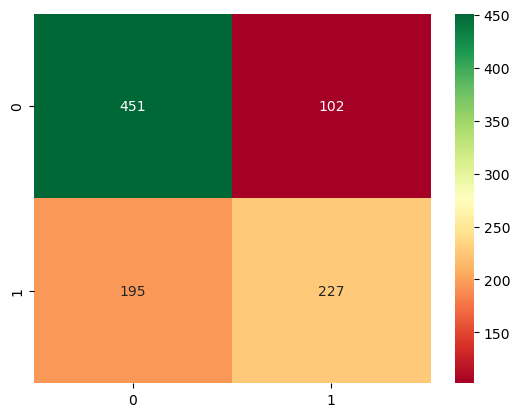

In [112]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
c_m_train = pd.DataFrame(confusion_matrix(Y_train, y_predict))
sns.heatmap(c_m_train,annot = True,fmt = '.5g',cmap = 'RdYlGn')

## Hyper tuning for Logistic regression

In [113]:
from sklearn.model_selection import GridSearchCV
grid={'solver':['newton-cg','liblinear','lbfgs','sag'],
      'tol':[0.0001,0.00001]}
model = LogisticRegression(max_iter=10000,n_jobs=-1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=4,scoring='f1',verbose=1) 
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=4,
             param_grid={'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=1)

In [114]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg')


In [115]:
model_log_best = grid_search.best_estimator_
model_log_best.fit(X_train, Y_train)
y_predict = model_log_best.predict(X_train)
model_score = model_log_best.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_predict))
print(metrics.classification_report(Y_train, y_predict))

0.6964102564102564
[[451 102]
 [194 228]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       553
           1       0.69      0.54      0.61       422

    accuracy                           0.70       975
   macro avg       0.70      0.68      0.68       975
weighted avg       0.70      0.70      0.69       975



<Axes: >

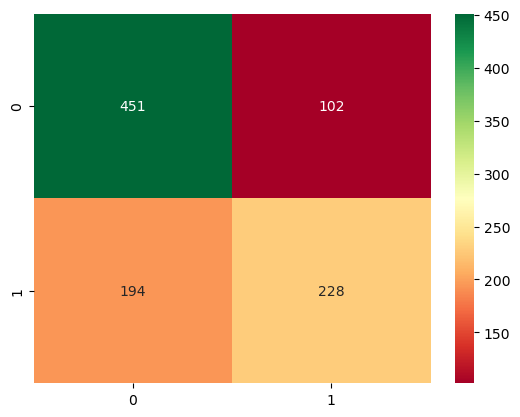

In [116]:
c_m_train = pd.DataFrame(confusion_matrix(Y_train, y_predict))
sns.heatmap(c_m_train,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [117]:
probs_train = model_log_best.predict_proba(X_train)
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(Y_train,probs_train)
auc_train

0.7252041856997162

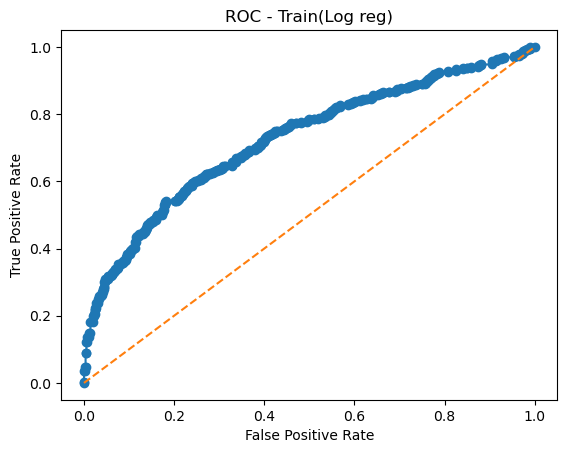

In [118]:
fpr, tpr,_=roc_curve(Y_train,model_log_best.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(Log reg)')
plt.show()

In [119]:
y_predict = model_log_best.predict(X_test)
model_score = model_log_best.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))
print(metrics.classification_report(Y_test, y_predict))

0.6148325358851675
[[172  54]
 [107  85]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       226
           1       0.61      0.44      0.51       192

    accuracy                           0.61       418
   macro avg       0.61      0.60      0.60       418
weighted avg       0.61      0.61      0.60       418



<Axes: >

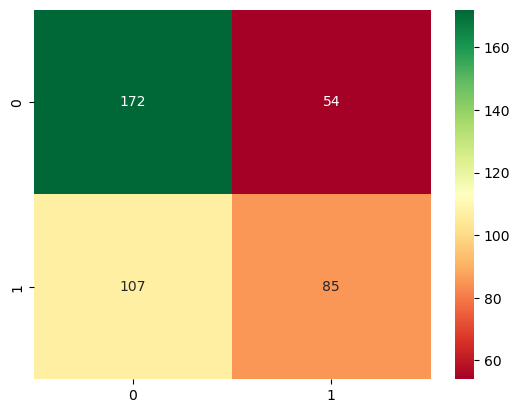

In [120]:
c_m_test = pd.DataFrame(confusion_matrix(Y_test, y_predict))
sns.heatmap(c_m_test,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [121]:
probs_test = model_log_best.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(Y_test,probs_test)
auc_test

0.654901825221239

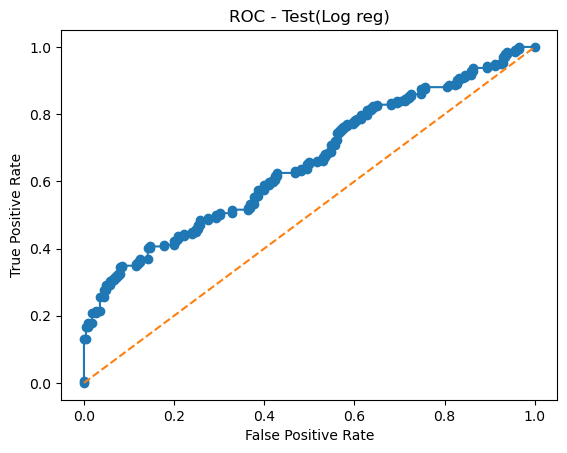

In [122]:
fpr, tpr,_=roc_curve(Y_test,model_log_best.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(Log reg)')
plt.show()

## LDA

In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,Y_train)
y_predict = model_lda.predict(X_train)
model_score = model_lda.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_predict))
print(metrics.classification_report(Y_train, y_predict))

0.6923076923076923
[[458  95]
 [205 217]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       553
           1       0.70      0.51      0.59       422

    accuracy                           0.69       975
   macro avg       0.69      0.67      0.67       975
weighted avg       0.69      0.69      0.68       975



<Axes: >

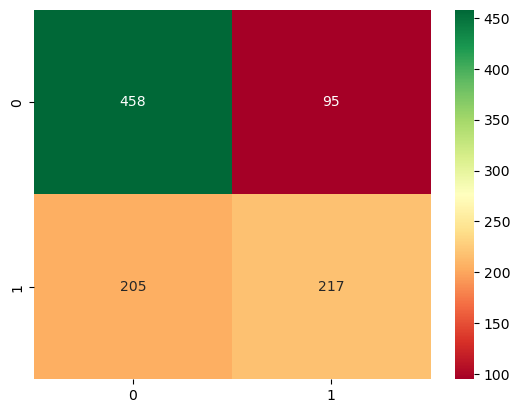

In [124]:
c_m_train = pd.DataFrame(confusion_matrix(Y_train, y_predict))
sns.heatmap(c_m_train,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [125]:
probs_train = model_lda.predict_proba(X_train)
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(Y_train,probs_train)
auc_train

0.7236358338404052

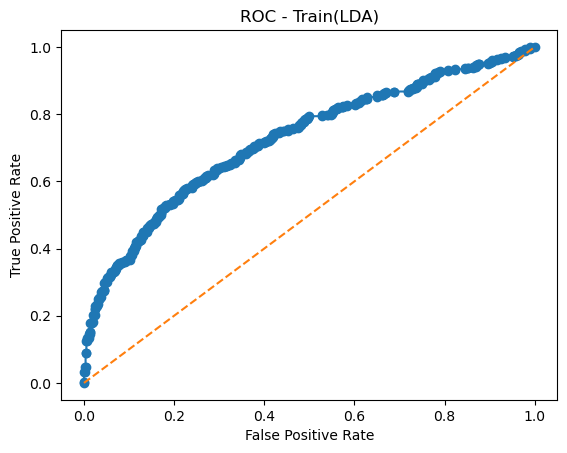

In [126]:
fpr, tpr,_=roc_curve(Y_train,model_lda.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(LDA)')
plt.show()

In [127]:
y_predict = model_lda.predict(X_test)
model_score = model_lda.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))
print(metrics.classification_report(Y_test, y_predict))

0.6220095693779905
[[178  48]
 [110  82]]
              precision    recall  f1-score   support

           0       0.62      0.79      0.69       226
           1       0.63      0.43      0.51       192

    accuracy                           0.62       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.62      0.62      0.61       418



<Axes: >

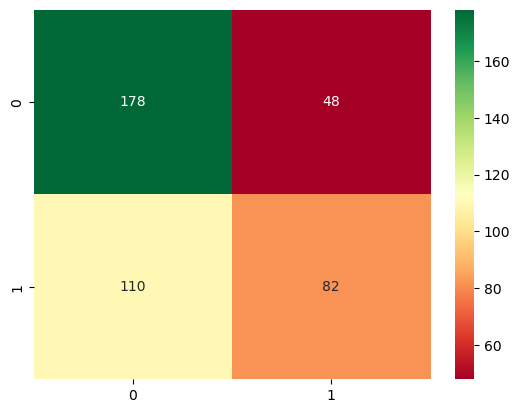

In [128]:
c_m_test = pd.DataFrame(confusion_matrix(Y_test, y_predict))
sns.heatmap(c_m_test,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [129]:
probs_test = model_lda.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(Y_test,probs_test)
auc_test

0.6563997971976401

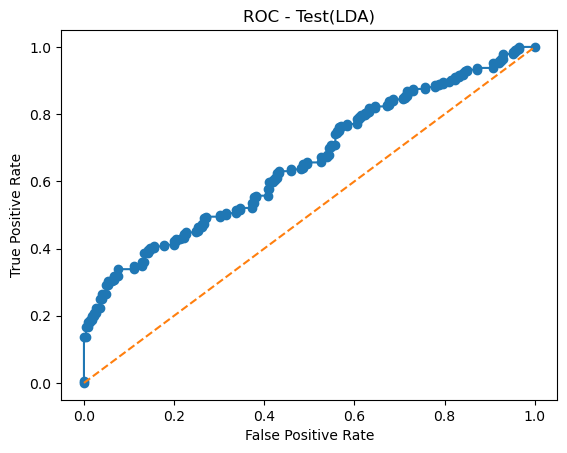

In [130]:
fpr, tpr,_=roc_curve(Y_test,model_lda.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(LDA)')
plt.show()

## CART

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
from sklearn import tree

train_char_label = ['1', '0']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [132]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.296648
No_of_children_born       0.249584
Standard_of_living_index  0.103591
Husband_Occupation        0.103481
Wife_education            0.095491
Wife_Working              0.047072
Husband_education         0.043868
Wife_religion             0.041354
Media_exposure            0.018911


In [133]:
y_predict = dt_model.predict(X_train)
model_score = dt_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_predict))
print(metrics.classification_report(Y_train, y_predict))

0.9835897435897436
[[553   0]
 [ 16 406]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       553
           1       1.00      0.96      0.98       422

    accuracy                           0.98       975
   macro avg       0.99      0.98      0.98       975
weighted avg       0.98      0.98      0.98       975



<Axes: >

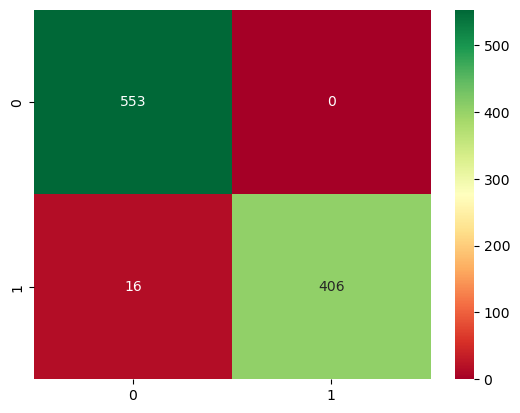

In [134]:
c_m_train = pd.DataFrame(confusion_matrix(Y_train, y_predict))
sns.heatmap(c_m_train,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [135]:
y_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))
print(metrics.classification_report(Y_test, y_predict))

0.6100478468899522
[[153  73]
 [ 90 102]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       226
           1       0.58      0.53      0.56       192

    accuracy                           0.61       418
   macro avg       0.61      0.60      0.60       418
weighted avg       0.61      0.61      0.61       418



<Axes: >

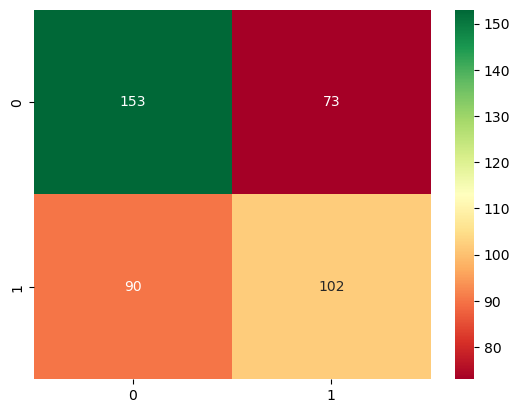

In [136]:
c_m_test = pd.DataFrame(confusion_matrix(Y_test, y_predict))
sns.heatmap(c_m_test,annot = True,fmt = '.5g',cmap = 'RdYlGn')

## Hyper tuning for CART

In [137]:
from sklearn.model_selection import RandomizedSearchCV
dt_model_best = DecisionTreeClassifier()
grid = {'criterion':["gini", "entropy", "log_loss"],
       'max_depth':list(range(10,100)),
       'min_samples_split':list(range(2,5)),
       'min_samples_leaf':list(range(1,100)),
       'min_impurity_decrease':list(np.arange(0.0001,0.01,0.001))}
random_search = RandomizedSearchCV(estimator = dt_model, param_distributions = grid, cv = 3,n_jobs=4,scoring='accuracy',verbose=1)
random_search.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, 32, 33,
                                                      34, 35, 36, 37, 38, 39, ...],
                                        'min_impurity_decrease': [0.0001,
                                                                  0.0011,
                                                                  0.0021,
                                                                  0.0031,
                                                                  0.0041,
                                                                  0.0051,
                                                                  0.0061,
                                                                  0.0071,
                                                                  0.0081,
                                                                  0.0091],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4]},
                   scoring='accuracy', verbose=1)

In [138]:
print(random_search.best_estimator_)

DecisionTreeClassifier(max_depth=75, min_impurity_decrease=0.0051,
                       min_samples_leaf=8, min_samples_split=3)


In [139]:
dt_model_best =random_search.best_estimator_
dt_model_best.fit(X_train,Y_train)

ld_Tree_best_File = open('ld_Tree_best_File.dot','w')
dot_data_best = tree.export_graphviz(dt_model_best, 
                                out_file=ld_Tree_best_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_best_File.close()

In [140]:
print (pd.DataFrame(dt_model_best.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.528979
Wife_age                  0.275917
Wife_education            0.154272
Husband_education         0.040832
Wife_religion             0.000000
Wife_Working              0.000000
Husband_Occupation        0.000000
Standard_of_living_index  0.000000
Media_exposure            0.000000


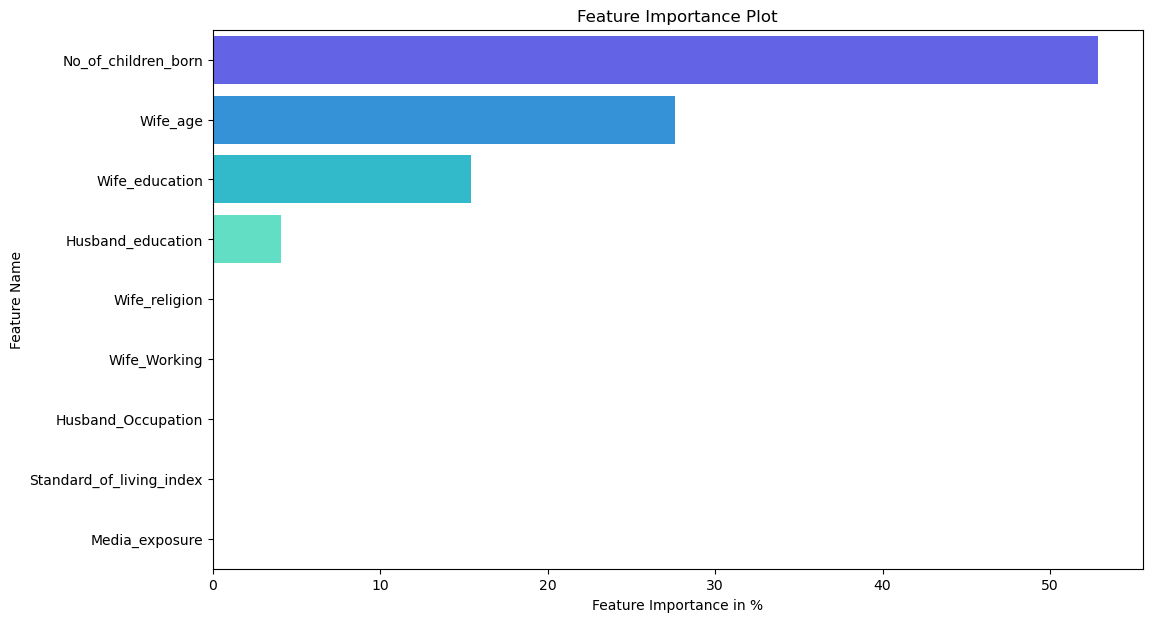

In [141]:
x=pd.DataFrame(dt_model_best.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [142]:
y_predict = dt_model_best.predict(X_train)
model_score = dt_model_best.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train, y_predict))
print(metrics.classification_report(Y_train, y_predict))

0.7425641025641025
[[458  95]
 [156 266]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.78       553
           1       0.74      0.63      0.68       422

    accuracy                           0.74       975
   macro avg       0.74      0.73      0.73       975
weighted avg       0.74      0.74      0.74       975



<Axes: >

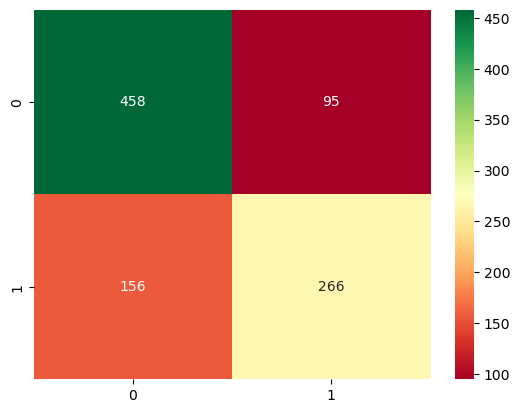

In [143]:
c_m_train = pd.DataFrame(confusion_matrix(Y_train, y_predict))
sns.heatmap(c_m_train,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [144]:
probs_train = dt_model_best.predict_proba(X_train)
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(Y_train,probs_train)
auc_train

0.7790445051978437

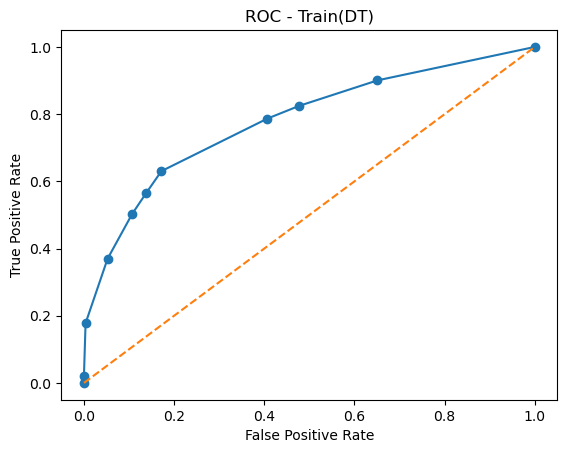

In [145]:
fpr, tpr,_=roc_curve(Y_train,dt_model_best.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Train(DT)')
plt.show()

In [146]:
y_predict = dt_model_best.predict(X_test)
model_score = dt_model_best.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test, y_predict))
print(metrics.classification_report(Y_test, y_predict))

0.6818181818181818
[[180  46]
 [ 87 105]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       226
           1       0.70      0.55      0.61       192

    accuracy                           0.68       418
   macro avg       0.68      0.67      0.67       418
weighted avg       0.68      0.68      0.68       418



<Axes: >

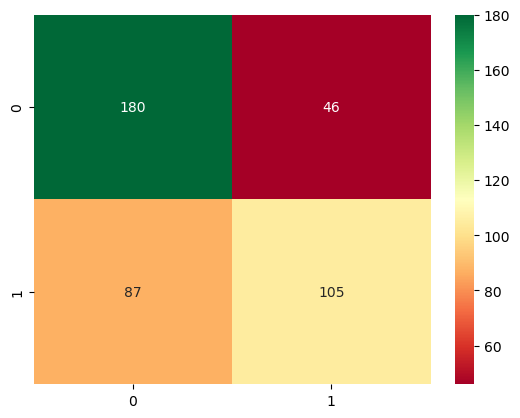

In [147]:
c_m_test = pd.DataFrame(confusion_matrix(Y_test, y_predict))
sns.heatmap(c_m_test,annot = True,fmt = '.5g',cmap = 'RdYlGn')

In [148]:
probs_test = dt_model_best.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(Y_test,probs_test)
auc_test

0.7196833517699115

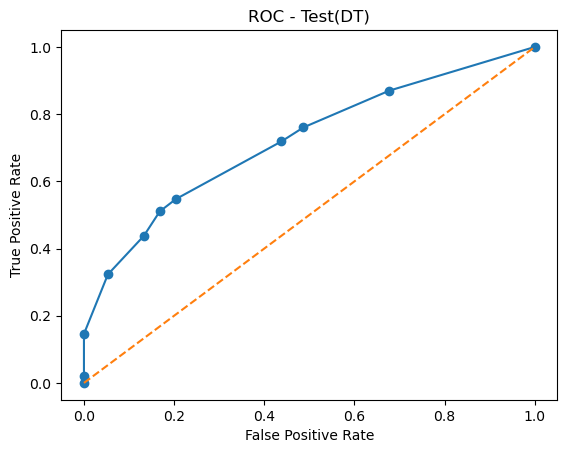

In [149]:
fpr, tpr,_=roc_curve(Y_test,dt_model_best.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Test(DT)')
plt.show()